<a href="https://colab.research.google.com/github/gspandhana/dataScience/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project 1: Data Analysis with Advertising Data**

Author: Spandhana Gonuguntla

Data is downloaded from https://www.statlearning.com/

**Importing Necessary Libraries**

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [76]:
data_filename = 'Advertising.csv'
df = pd.read_csv(data_filename)

Get a quick look of the data

In [77]:
df.iloc[:]

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [78]:
### edTest(test_pandas) ###
# Create a new dataframe by selecting the first 7 rows of
# the current dataframe
df_new = df.iloc[:7]
print(df_new)

   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9
5           6    8.7   48.9       75.0    7.2
6           7   57.5   32.8       23.5   11.8


**Plotting**

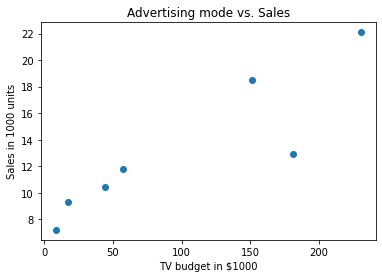

In [79]:
plt.scatter(x = df_new["TV"], y = df_new["sales"])
plt.xlabel ("TV budget in $1000")
plt.ylabel ("Sales in 1000 units")
plt.title("Advertising mode vs. Sales");

**Plotting Scatter plot of the whole dataset**

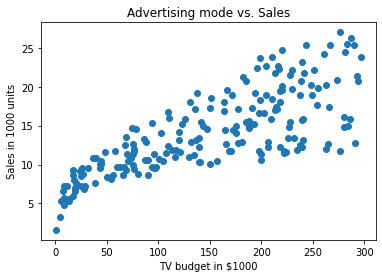

In [80]:
plt.scatter(x = df["TV"], y = df["sales"])
plt.xlabel ("TV budget in $1000")
plt.ylabel ("Sales in 1000 units")
plt.title("Advertising mode vs. Sales");

**Plotting Line Plot of the whole dataset**


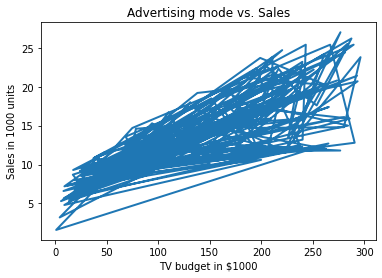

In [81]:
plt.plot(df["TV"], df["sales"], linewidth=2.0)
plt.xlabel ("TV budget in $1000")
plt.ylabel ("Sales in 1000 units")
plt.title("Advertising mode vs. Sales");

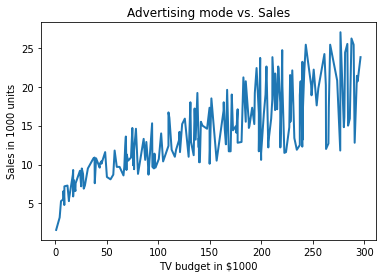

In [82]:
df2 = df.sort_values(by="TV")
plt.plot(df2["TV"], df2["sales"], linewidth=2.0)
plt.xlabel ("TV budget in $1000")
plt.ylabel ("Sales in 1000 units")
plt.title("Advertising mode vs. Sales");

**Implementing KNN Algorithm **

In [83]:
# Get a subset of the data i.e. rows 5 to 13
# Use the TV column as the predictor
x_true = df.TV.iloc[5:13]

# Use the Sales column as the response
y_true = df.sales.iloc[5:13]
[x_true.values, y_true.values]

[array([  8.7,  57.5, 120.2,   8.6, 199.8,  66.1, 214.7,  23.8]),
 array([ 7.2, 11.8, 13.2,  4.8, 10.6,  8.6, 17.4,  9.2])]

In [84]:
# Sort the data to get indices ordered from lowest to highest TV values
idx = np.argsort(x_true.values)

# Get the predictor data in the order given by idx above
x_true  = x_true.iloc[idx].values

# Get the response data in the order given by idx above
y_true  = y_true.iloc[idx].values

[x_true, y_true]

[array([  8.6,   8.7,  23.8,  57.5,  66.1, 120.2, 199.8, 214.7]),
 array([ 4.8,  7.2,  9.2, 11.8,  8.6, 13.2, 10.6, 17.4])]

**PART 1:** Manually implementing KNN (n=1)

In [85]:
# Define a function that finds the index of the nearest neighbor 
# and returns the value of the nearest neighbor.  
# Note that this is just for k = 1 where the distance function is 
# simply the absolute value.

def find_nearest(array,value):
    
    # Hint: To find idx, use .idxmin() function on the series
    idx = pd.Series(np.abs(array-value)).idxmin() 

    # Return the nearest neighbor index and value
    return idx, array[idx]

In [86]:
# Create some synthetic x-values (might not be in the actual dataset)
x = np.linspace(np.min(x_true), np.max(x_true))

# Initialize the y-values for the length of the synthetic x-values to zero
y = np.zeros((len(x)))


In [87]:
# Apply the KNN algorithm to predict the y-value for the given x value
for i, xi in enumerate(x):

    # Get the Sales values closest to the given x value
    y[i] = y_true[find_nearest(x_true, xi )[0]]
    

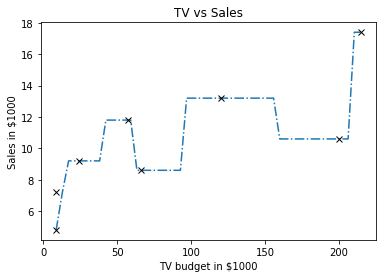

In [88]:
# Plot the synthetic data along with the predictions    
plt.plot(x, y, '-.')

# Plot the original data using black x's.
plt.plot(x_true, y_true, 'kx')

# Set the title and axis labels
plt.title('TV vs Sales')
plt.xlabel('TV budget in $1000')
plt.ylabel('Sales in $1000');

**PART 2:** KNN for k>=1 using sklearn

In [89]:
# Read the data from the file "Advertising.csv"
data_filename = 'Advertising.csv'
df = pd.read_csv(data_filename)

# Set 'TV' as the 'predictor variable'   
x = df[["TV"]]

# Set 'Sales' as the response variable 'y' 
y = df["sales"]

In [90]:
# Split the dataset in training and testing with 60% training set 
# and 40% testing set with random state = 42
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.6,random_state=42)
k_value_min = 1
k_value_max = 70

# Create a list of integer k values betwwen k_value_min and k_value_max using linspace
k_list = np.linspace(k_value_min, k_value_max, 70)


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


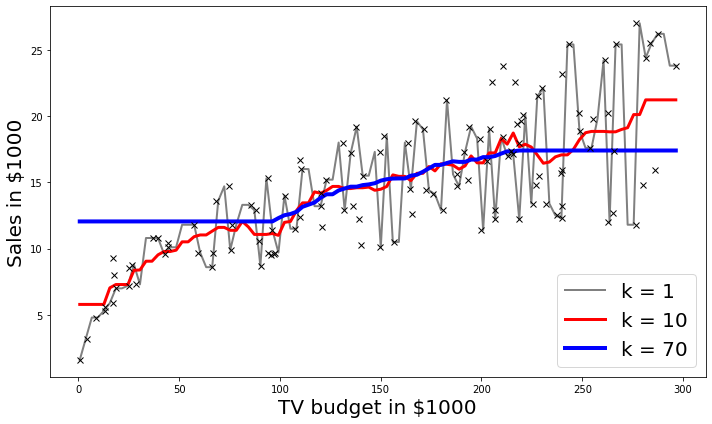

In [91]:
# Set the grid to plot the values
fig, ax = plt.subplots(figsize=(10,6))

# Create a dictionary to store the k value against MSE fit {k: MSE@k} 
knn_dict = {}

# Variable used to alter the linewidth of each plot
j=0

# Loop over all the k values
for k_value in k_list:   
    
    # Creating a kNN Regression model 
    model = KNeighborsRegressor(n_neighbors=int(k_value))
    
    # Fitting the regression model on the training data 
    model.fit(x_train,y_train)
    
    # Use the trained model to predict on the test data 
    y_pred = model.predict(x_test)
    
    # Helper code to plot the data along with the model predictions
    colors = ['grey','r','b']
    if k_value in [1,10,70]:
        xvals = np.linspace(x.min(),x.max(),100)
        ypreds = model.predict(xvals)
        ax.plot(xvals, ypreds,'-',label = f'k = {int(k_value)}',linewidth=j+2,color = colors[j])
        j+=1
        
ax.legend(loc='lower right',fontsize=20)
ax.plot(x_train, y_train,'x',label='train',color='k')
ax.set_xlabel('TV budget in $1000',fontsize=20)
ax.set_ylabel('Sales in $1000',fontsize=20)
plt.tight_layout()

**Evaluating Goodness of Fit**

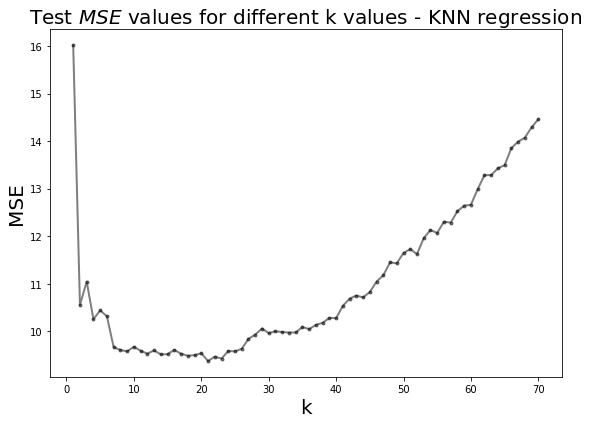

In [92]:
# Create a dictionary to store the k value against MSE fit {k: MSE@k} 
knn_dict = {}

# Variable used for altering the linewidth of values kNN models
j=0

# Loop over all k values
for k_value in k_list: 
      
    # Create a KNN Regression model for the current k
    model = KNeighborsRegressor(n_neighbors=int(k_value))
    
    # Fit the model on the train data
    model.fit(x_train,y_train)
    
    # Use the trained model to predict on the test data
    y_pred = model.predict(x_test)
    
    # Calculate the MSE of the test data predictions
    residual = np.abs(y_pred - y_test)
    MSE = 1/len(x_test)*np.sum(residual**2)

    # Store the MSE values of each k value in the dictionary
    knn_dict[k_value] = MSE

# Plot a graph which depicts the relation between the k values and MSE
plt.figure(figsize=(8,6))
plt.plot(knn_dict.keys(), knn_dict.values(),'k.-',alpha=0.5,linewidth=2)

# Set the title and axis labels
plt.xlabel('k',fontsize=20)
plt.ylabel('MSE',fontsize = 20)
plt.title('Test $MSE$ values for different k values - KNN regression',fontsize=20)
plt.tight_layout()
    



In [93]:
# Find the lowest MSE among all the kNN models
min_mse = min(knn_dict.values())

# Use list comprehensions to find the k value associated with the lowest MSE
best_model = [key  for (key, value) in knn_dict.items() if value == min_mse]

# Print the best k-value
print ("The best k value is ",best_model,"with a MSE of ", min_mse)


The best k value is  [21.0] with a MSE of  9.373705215419498


In [95]:
# Helper code to compute the R2_score of your best model
model = KNeighborsRegressor(n_neighbors=int(best_model[0]))
model.fit(x_train,y_train)
y_pred_test = model.predict(x_test)

# Print the R2 score of the model
print(f"The R2 score for your model is {r2_score(y_test, y_pred_test)}")

The R2 score for your model is 0.6291573669955478
